In [25]:
#basic imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Activation,Dropout
import warnings
warnings.filterwarnings('ignore')

In [10]:
#specify the directory to the images
train_dir = '/Users/aadityajoshi/Downloads/train'

In [96]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(416,416),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(416,416),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 326 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


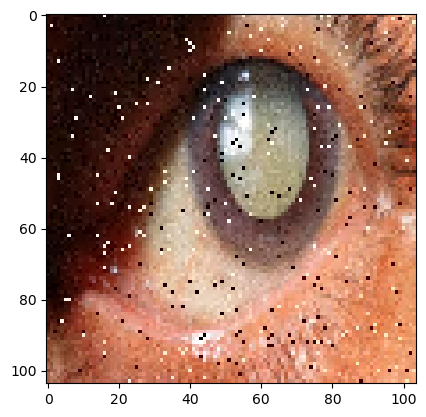

In [65]:
plt.imshow(train_generator[5][0][4])

In [185]:
#creating model
def create_cnn_model_4Conv():
    #create model
    model = Sequential()
    #layer 1-> convolution model
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(416,416,3)))
    #Pooling1
    model.add(MaxPool2D((2,2)))
    #dim -> 208x208x32
    #layer 2 ->convolution
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
    #Pooling 2
    model.add(MaxPool2D((2,2)))
    #dim ->104x104x64
    #layer 3 ->convolution
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same'))
    #Pooling 3
    model.add(MaxPool2D((2,2)))
    #dim -> 52x52x128
    #layer 3 ->convolution
    model.add(BatchNormalization(axis=3))
    #RELU3
    model.add(Activation('relu'))
    #dim->52x52x1
    #Flatten
    model.add(Flatten())
    #fully Connected Layer
    #FC Layer 1 ->128
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    #output
    model.add(Dense(1,activation='sigmoid'))
    #compile
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model
    

In [140]:
from tensorflow.keras.backend import clear_session
clear_session()
Conv4_model = create_cnn_model_4Conv()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 416, 416, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 208, 208, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 208, 208, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 104, 104, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    44,302,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,353 (169.36 MB)

 Trainable params: 44,396,097 (169.36 MB)

 Non-trainable params: 256 (1.00 KB)

In [183]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
    history = Conv4_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=10,verbose=0)

2024-06-28 21:22:47.590661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-28 21:22:47.590678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_56]]
2024-06-28 21:22:47.590688: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15404283699390677434
2024-06-28 21:22:47.590694: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10740335183192932759
2024-06-28 21:22:47.590700: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11952065759191462503
2024-06-28 21:22:47.590705: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1552250

2024-06-28 21:22:56.552774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-28 21:22:56.552795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6907788340944494990
2024-06-28 21:22:56.552801: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17772232449853034960
2024-06-28 21:22:56.552807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_6/_46]]
2024-06-28 21:22:56.552826: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10740335183192932759
2024-06-28 21:22:56.552831: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 179959539

In [184]:
loss, accuracy = Conv4_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9062 - loss: 0.3601


In [180]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)
    
    # Resize to 416x416
    img = img.resize((416, 416))
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    # Normalize pixel values to range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to (416, 416, 3) assuming RGB color channels
    img_array = img_array.reshape((416, 416, 3))
    
    return img_array


(416, 416, 3)


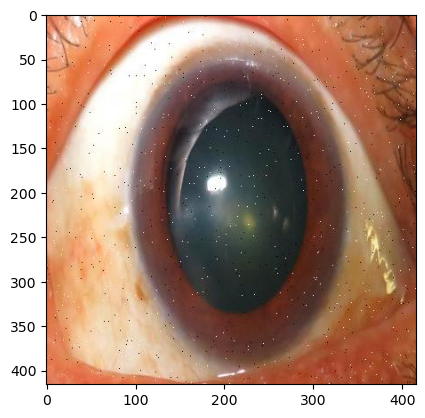

In [190]:
processed_image_1 = preprocess_image('/Users/aadityajoshi/Downloads/train_catract/27_JPG_jpg.rf.7d6369561c657b7def1630d3cb1fa6ee.jpg')
print(processed_image_1.shape)
plt.imshow(processed_image_1)

In [191]:
prediction = Conv4_model.predict(processed_image_1.reshape(-1,416,416,3))
predicted_class = (prediction > 0.5).astype('int32')
print(predicted_class)
if predicted_class[0][0] == 0:
    print("No or Immature Cataract")
else:
    print("Mature Cataract")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0]]
No or Immature Cataract


(416, 416, 3)


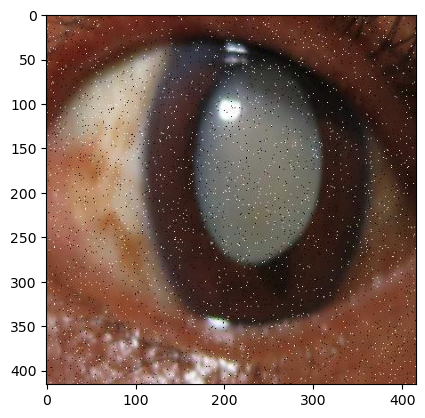

In [192]:
processed_image_2 = preprocess_image('/Users/aadityajoshi/Downloads/train_catract/1_JPG_jpg.rf.998dfa09a15c56db044883d757737f0e.jpg')
print(processed_image_2.shape)
plt.imshow(processed_image_2)

In [193]:
prediction_2 = Conv4_model.predict(processed_image_2.reshape(-1,416,416,3))
predicted_class = (prediction_2 > 0.5).astype('int32')
print(predicted_class)
if predicted_class[0][0] == 0:
    print("No or Immature Cataract")
else:
    print("Mature Cataract")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[1]]
Mature Cataract
